# Dimensionality reduction and PCA usign SVD

In [19]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

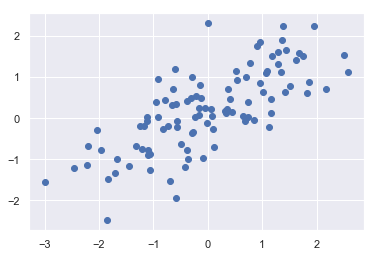

In [20]:
data = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T
plt.scatter(data[:, 0], data[:, 1])

## [PCA()](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
print("PCA components:\n", pca.components_)
print("Variance explained:\n", pca.explained_variance_)

PCA components:
 [[-0.9000025  -0.43588473]
 [ 0.43588473 -0.9000025 ]]
Variance explained:
 [1.05906206 0.33938092]


In [10]:
pca = PCA(n_components=1)
pca.fit(data)
data_sub = pca.transform(data)
print("original shape:   ", data.shape)
print("compressed space using linear transformation shape:", data_sub.shape)

original shape:    (100, 2)
compressed space using linear transformation shape: (100, 1)


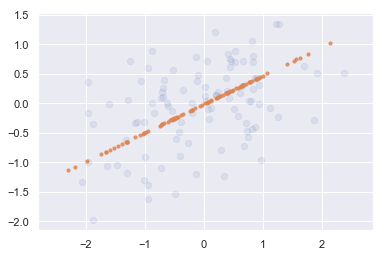

In [11]:
proj = pca.inverse_transform(data_sub)
plt.scatter(data[:, 0], data[:, 1], s=40, alpha=0.1)
plt.scatter(proj[:, 0], proj[:, 1], s=10, alpha=0.8)
plt.axis('equal');

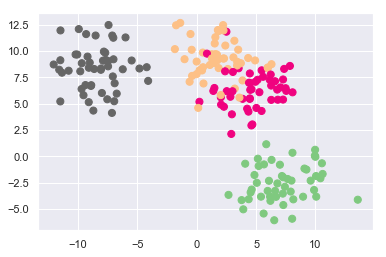

In [12]:
from sklearn.datasets.samples_generator import make_blobs

data, true_label = make_blobs(n_samples=200,centers=4,
                       cluster_std=1.9, random_state=32)

plt.scatter(data[:, 0], data[:, 1], s=50, c=true_label, cmap=plt.cm.get_cmap('Accent', 10))

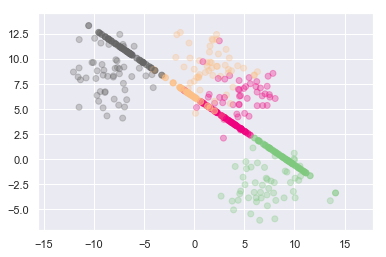

In [13]:
pca = PCA(n_components=1)
pca.fit(data)
data_sub = pca.transform(data)

proj = pca.inverse_transform(data_sub)
plt.scatter(data[:, 0], data[:, 1], alpha=0.3,c=true_label, cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(proj[:, 0], proj[:, 1], alpha=0.6,c=true_label, cmap=plt.cm.get_cmap('Accent', 10))
plt.axis('equal');

Text(0.5, 0, 'component 3')

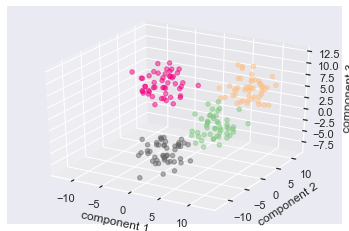

In [14]:
from mpl_toolkits.mplot3d import Axes3D

data3d, true_label = make_blobs(n_samples=200, n_features=3,centers=4,
                       cluster_std=1.9, random_state=32)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3d[:, 0], data3d[:, 1], data3d[:, 2], c=true_label,  alpha=0.5, 
           cmap=plt.cm.get_cmap('Accent', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')

Text(0.5, 1.0, 'Data projection')

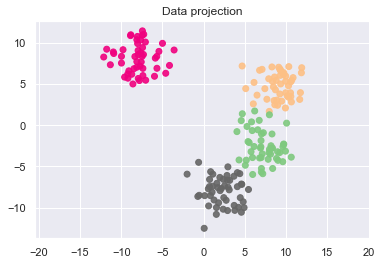

In [15]:
pca_ = PCA(n_components=2)
pca_.fit(data3d)
data_sub_ = pca_.transform(data3d)

proj_ = pca_.inverse_transform(data_sub_)
plt.scatter(proj_[:, 0], proj_[:, 1], alpha=0.9,c=true_label, cmap=plt.cm.get_cmap('Accent', 10))
plt.axis('equal');
plt.title('Data projection')

# PCA for visualization

(1797, 64)

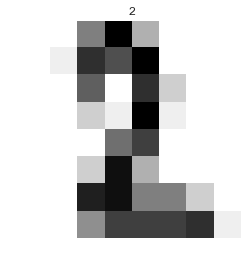

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.data[22,:].reshape(8,8), cmap="gray_r")
plt.title(digits.target[22])
plt.grid(False), plt.axis('off')
digits.data.shape

In [17]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


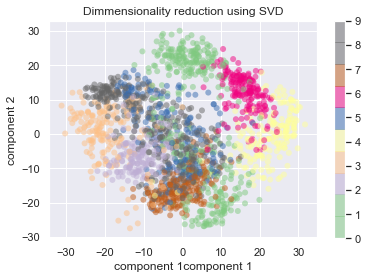

In [18]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1component 1')
plt.ylabel('component 2')
plt.title('Dimmensionality reduction using SVD')
plt.colorbar();

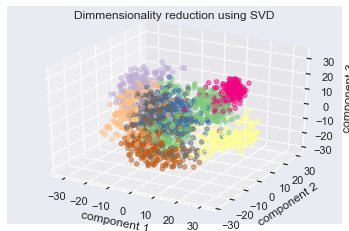

In [19]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(3)
projected = pca.fit_transform(digits.data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2], c=digits.target,  alpha=0.5, 
           cmap=plt.cm.get_cmap('Accent', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.set_title('Dimmensionality reduction using SVD');

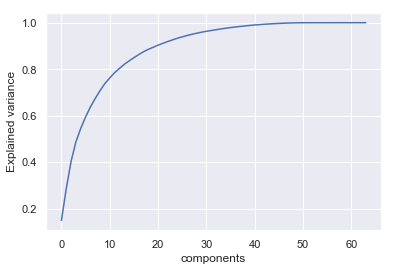

In [20]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('Explained variance');

## Visualization usign [TSNE()](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [21]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
data_reduced = tsne.fit_transform(digits.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.480s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.394135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.496628
[t-SNE] KL divergence after 300 iterations: 0.954954


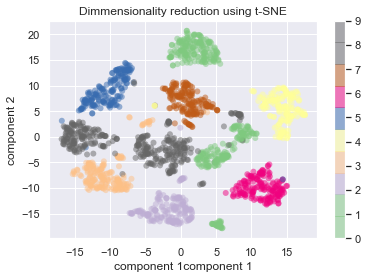

In [22]:
plt.scatter(data_reduced[:, 0], data_reduced[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1component 1')
plt.ylabel('component 2')
plt.title('Dimmensionality reduction using t-SNE')
plt.colorbar();

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.005s...
[t-SNE] Computed neighbors for 1797 samples in 0.396s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.394135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.773293
[t-SNE] KL divergence after 300 iterations: 0.822258


Text(0.5, 0.92, 'Dimmensionality reduction using t-SNE')

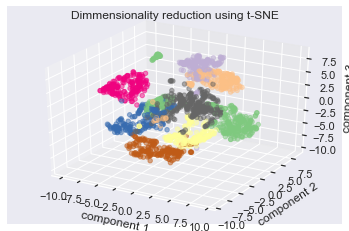

In [23]:
tsne3d = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
data_reduced3d = tsne3d.fit_transform(digits.data)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_reduced3d[:, 0], data_reduced3d[:, 1], data_reduced3d[:, 2], c=digits.target,  alpha=0.5, 
           cmap=plt.cm.get_cmap('Accent', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.set_title('Dimmensionality reduction using t-SNE')

## Compression using SVD

(<matplotlib.image.AxesImage at 0x1a26994390>,
 (-0.5, 1959.5, 1959.5, -0.5),
 None)

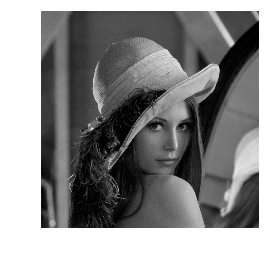

In [3]:
from PIL import Image
image = Image.open('lana.jpg')
imgage_gray = image.convert('LA')

image_mat = np.array(list(imgage_gray.getdata(band=0)), float)
image_mat.shape = (imgage_gray.size[1], imgage_gray.size[0])
image_mat = np.matrix(image_mat)

plt.imshow(image_mat, cmap='gray'), plt.axis('off'), plt.grid(False)

In [4]:
U, sigma, V = np.linalg.svd(image_mat)

print("U:", U.shape)
print("sigma:", sigma.shape)
print("V:", V.shape)

U: (1960, 1960)
sigma: (1960,)
V: (1960, 1960)


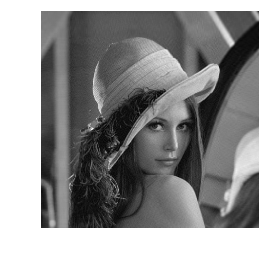

In [14]:
k=100

image_aprox = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])

plt.imshow(image_aprox, cmap='gray'), plt.axis('off'), plt.grid(False);

## Noise removal using SVD

Using TensorFlow backend.


(None, (-0.5, 27.5, 27.5, -0.5))

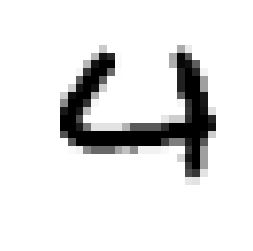

In [27]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[60],cmap='gray_r', interpolation='nearest')
plt.grid(False), plt.axis('off')

In [28]:
data_images = np.array([image.flatten() for image in x_train])
noisy_data = np.random.normal(data_images, 50) #add some noise do data

(None, (-0.5, 27.5, 27.5, -0.5))

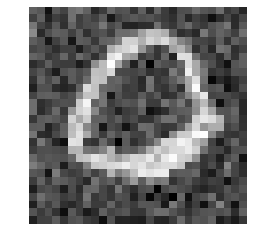

In [52]:
id=3012
plt.imshow(noisy_data[id].reshape(28,-1),cmap='gray', interpolation='nearest')
plt.grid(False), plt.axis('off')

In [49]:
pca = PCA(.7).fit(noisy_data)
print("Using " + str(pca.n_components_) + " components")

removing_noise = pca.transform(noisy_data)
filtered = pca.inverse_transform(removing_noise)

Using 186 components


(None, (-0.5, 27.5, 27.5, -0.5))

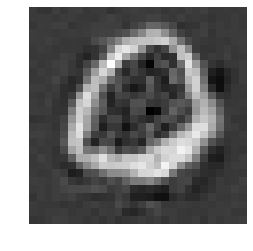

In [53]:
plt.imshow(filtered[id].reshape(28,-1),cmap='gray', interpolation='nearest')
plt.grid(False), plt.axis('off')

(None, (-0.5, 27.5, 27.5, -0.5))

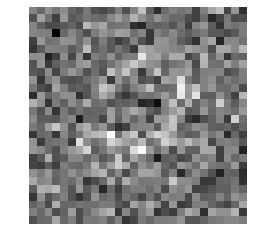

In [32]:
extreme_noisy_data = np.random.normal(data_images, 150) #add some noise do data
id=3023
plt.imshow(extreme_noisy_data[id].reshape(28,-1),cmap='gray', interpolation='nearest')
plt.grid(False), plt.axis('off')

In [33]:
pca = PCA(.25,whiten=True).fit(extreme_noisy_data)
print("Using " + str(pca.n_components_) + " components")

removing_noise = pca.transform(extreme_noisy_data)
ex_filtered = pca.inverse_transform(removing_noise)

Using 93 components


(None, (-0.5, 27.5, 27.5, -0.5))

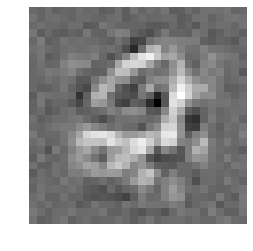

In [34]:
plt.imshow(ex_filtered[id].reshape(28,-1),cmap='gray', interpolation='nearest')
plt.grid(False), plt.axis('off')

(None, (-0.5, 27.5, 27.5, -0.5))

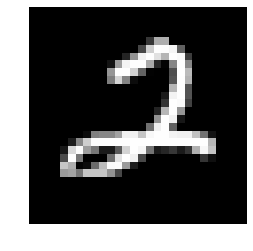

In [35]:
plt.imshow(data_images[id].reshape(28,-1),cmap='gray', interpolation='nearest')
plt.grid(False), plt.axis('off')

## Example: Eigenfaces using [LFW dataset](http://vis-www.cs.umass.edu/lfw/)

In [15]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 62, 47)


In [16]:
print(faces.data.shape)

(1288, 2914)


In [29]:
pca = PCA(25,whiten=True).fit(faces.data)
filtered = pca.transform(faces.data)
filtered_faces = pca.inverse_transform(filtered)

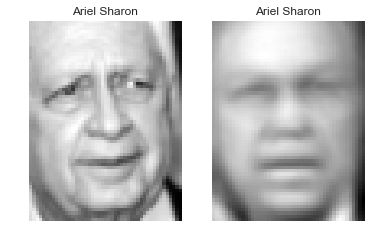

In [30]:
id=1233
plt.subplot("121")
plt.imshow(faces.data[id,:].reshape(62,47), cmap="gray")
plt.title(faces.target_names[faces.target[id]])
plt.grid(False), plt.axis('off');
plt.subplot("122")
plt.imshow(filtered_faces[id,:].reshape(62,47), cmap="gray")
plt.title(faces.target_names[faces.target[id]])
plt.grid(False), plt.axis('off');

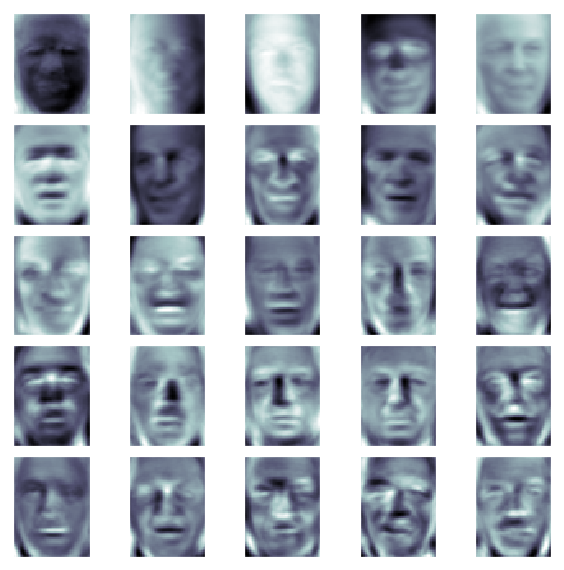

In [40]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, \
                         gridspec_kw={'hspace':0.1, 'wspace':0.2})

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

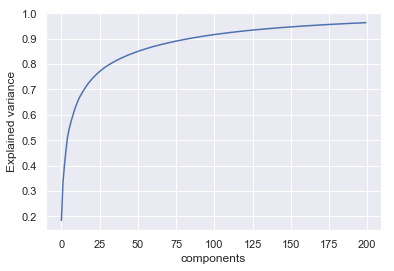

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('components')
plt.ylabel('Explained variance');

## Stdent task

- Using SVD and t-SNE visualize in __two__ dimention feature space hand written digits form __mnist__ and __faces__ from LFW dataset. 
- Plot __main__ eigen vectors used learned by SVD

In [ ]:
# ...